In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from google.colab import drive

from sklearn.model_selection import train_test_split

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.corpus import stopwords
import ast

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Peek

In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Text/Text Classification/Real or Not? NLP with Disaster Tweets/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Text/Text Classification/Real or Not? NLP with Disaster Tweets/test.csv'

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
train.sample(5)

,id,keyword,location,text,target
4475,6365,hostages,cuba,#hot C-130 specially modified to land in a st...,1
2863,4114,drought,Canada,CANADA BC DROUGHT: Okanagan region issued Leve...,1
4052,5757,forest%20fires,Cape Cod,Photo: blue by @forest.fires source: http://t....,1
1119,1614,bombed,Erbil,.@Vagersedolla visits villages recently bombed...,1
2522,3625,desolation,infj,going to redo my nails and watch behind the sc...,1


In [8]:
def clean():
  plt.tight_layout()
  plt.show()

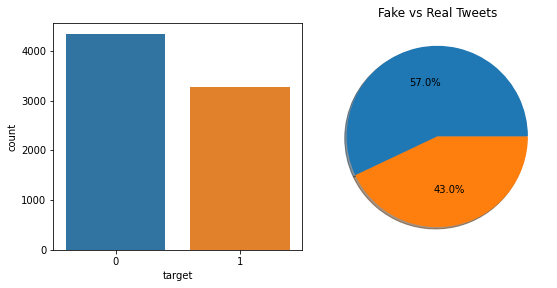

In [9]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (8,4))

sns.countplot(x = train['target'], ax = ax1)
ax2.pie(train['target'].value_counts(), autopct='%1.1f%%', shadow = True)
plt.title('Fake vs Real Tweets')

clean()

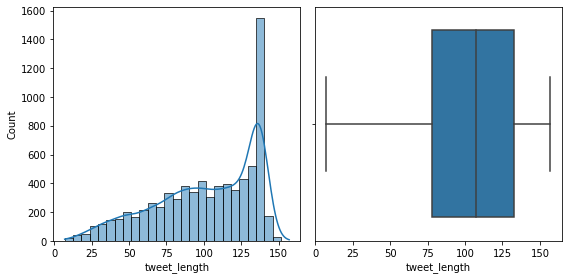

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (8,4))

train['tweet_length'] = train['text'].apply(lambda x: len(x))

sns.histplot(train['tweet_length'], kde = True, ax =ax1)
sns.boxplot(x = train['tweet_length'],ax = ax2)

clean()

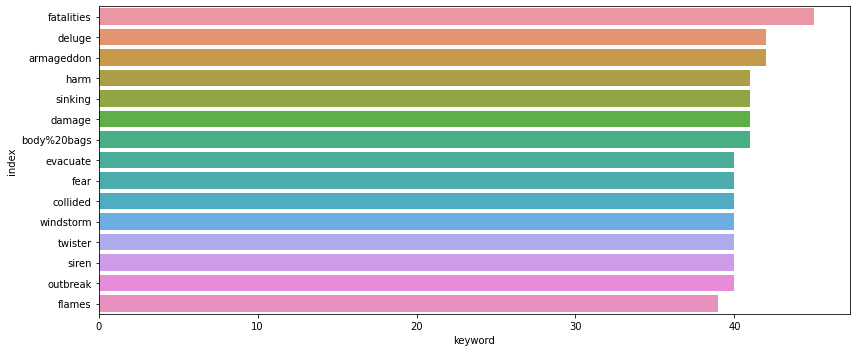

In [11]:
keyword_check = train['keyword'].value_counts().reset_index()
keyword_check.head()

fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(x = keyword_check['keyword'][:15], y = keyword_check['index'][:15])
clean()

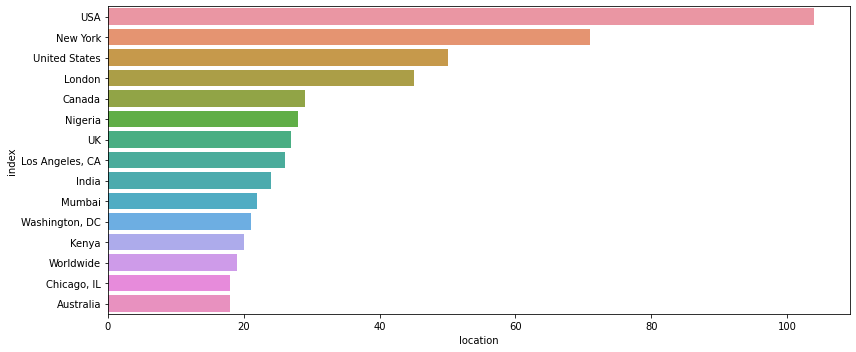

In [12]:
fig, ax = plt.subplots(figsize = (12,5))

location = train['location'].value_counts().reset_index()
list_location = list(location['index'])
sns.barplot(x = location['location'][:15], y = location['index'][0:15])

clean()

In [13]:
loc_dict={'United States':'USA','New York':'USA',"London":'UK',"Los Angeles, CA":'USA',"Washington, D.C.":'USA',
          "California":'USA',"Chicago, IL":'USA',"Chicago":'USA',"New York, NY":'USA',"California, USA":'USA',
          "FLorida":'USA',"Nigeria":'Africa',"Kenya":'Africa',"Everywhere":'Worldwide',"San Francisco":'USA',
          "Florida":'USA',"United Kingdom":'UK',"Los Angeles":'USA',"Toronto":'Canada',"San Francisco, CA":'USA',
          "NYC":'USA',"Seattle":'USA',"Earth":'Worldwide',"Ireland":'UK',"London, England":'UK',"New York City":'USA',
          "Texas":'USA',"London, UK":'UK',"Atlanta, GA":'USA',"Mumbai":"India", "Washington, DC":"USA","Sacramento, CA":"USA","Dallas, TX":"USA",
          "Denver, Colorado":"USA"}

train['location'].replace(loc_dict, inplace = True)

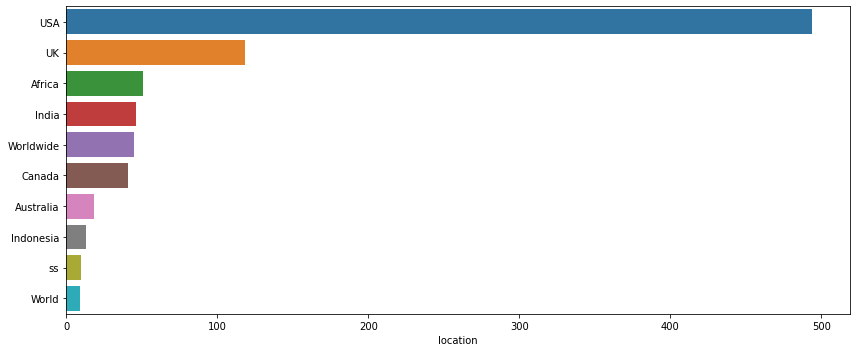

In [14]:
fig ,ax = plt.subplots(figsize = (12,5))

sns.barplot(y=train['location'].value_counts()[:10].index, x=train['location'].value_counts()[:10])
clean()

# Clean Text:

In [15]:
train_df, valid_df = train_test_split(train, test_size=0.25,shuffle = True)

In [16]:
print(train_df.shape)
print(valid_df.shape)

(5709, 6)
(1904, 6)


In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
def preprocess_text(df):
  df['text_cleaned'] = df['text'].apply(lambda x: ' '.join([w for w in word_tokenize(x) if not w in stop_words]))

  df['text_cleaned_v2'] = df['text_cleaned'].apply(lambda x: re.sub('[^0-9a-zA-Z]+', ' ', x))
  df['text_cleaned_v2'] = df['text_cleaned_v2'].apply(lambda x: x.replace('  ',' '))
  df['text_cleaned_v2'] = df['text_cleaned_v2'].apply(lambda x: x.strip())
  
  return df

In [21]:
train_df = preprocess_text(train_df.copy())
valid_df = preprocess_text(valid_df.copy())
test_df = preprocess_text(test.copy())

In [22]:
train_df.head(5)

,id,keyword,location,text,target,tweet_length,text_cleaned,text_cleaned_v2
7065,10119,upheaval,"Auckland, New Zealand",An indepth look at the new world of work and h...,0,139,An indepth look new world work young people bu...,An indepth look new world work young people bu...
2439,3503,derailment,Mumbai (India),Madhya Pradesh Train Derailment: Village Youth...,1,63,Madhya Pradesh Train Derailment : Village Yout...,Madhya Pradesh Train Derailment Village Youth ...
4456,6339,hostages,"Cumming, GA",C-130 specially modified to land in a stadium ...,1,127,C-130 specially modified land stadium rescue h...,C 130 specially modified land stadium rescue h...
1235,1776,buildings%20on%20fire,"Tulsa, Oklahoma",Multiple Buildings On Fire In Downtown Hinton ...,1,91,Multiple Buildings On Fire In Downtown Hinton ...,Multiple Buildings On Fire In Downtown Hinton ...
591,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0,106,# world FedEx longer transport bioterror germs...,world FedEx longer transport bioterror germs w...


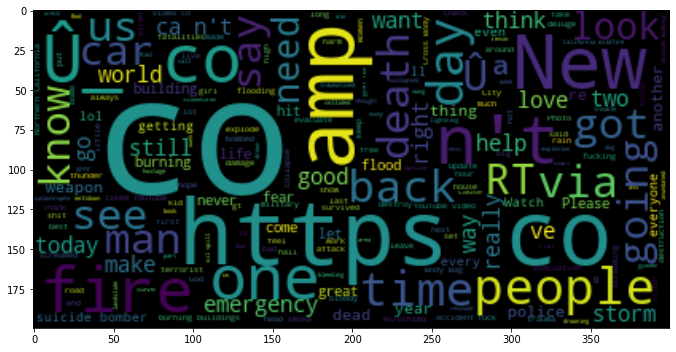

In [23]:
fig ,ax = plt.subplots(figsize = (12,5))

wordcloud2 = WordCloud().generate(' '.join(train_df['text_cleaned']))
plt.imshow(wordcloud2, interpolation="bilinear")

clean()

# Tokenize:

In [24]:
training_sentences = list(train_df['text_cleaned_v2'])
training_labels = np.array(train_df['target'])
validation_sentences = list(valid_df['text_cleaned_v2'])
validation_labels = np.array(valid_df['target'])
testing_sentences = list(test_df['text_cleaned_v2'])

In [25]:
vocab_size = 25000
embedding_dim = 1024
max_length = 250
trunc_type='post'
oov_tok = "<OOV>"

In [26]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

valid_sequences = tokenizer.texts_to_sequences(validation_sentences)
valid_padded = pad_sequences(valid_sequences,maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# LSTM Model:


In [27]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences= True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 1024)         25600000  
_________________________________________________________________
bidirectional (Bidirectional (None, 250, 512)          2623488   
_________________________________________________________________
dropout (Dropout)            (None, 250, 512)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 250, 256)          656384    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250, 256)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [28]:
num_epochs = 2
lstm_history = lstm_model.fit(padded, training_labels, epochs=num_epochs,validation_data= (valid_padded,validation_labels))

Epoch 1/2
179/179 [==============================] - 66s 368ms/step - loss: 0.5251 - accuracy: 0.7422 - val_loss: 0.4696 - val_accuracy: 0.7983
Epoch 2/2
179/179 [==============================] - 63s 353ms/step - loss: 0.2312 - accuracy: 0.9152 - val_loss: 0.5985 - val_accuracy: 0.7600


In [29]:
sentiment = lstm_model.predict(np.array(testing_padded[0]))[0][0]
print()
print('Sentiment =', sentiment)
if (round(sentiment) == 0):
    print('Negative')
else:
    print('Positive')


Sentiment = 0.44176963
Negative


Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [30]:
lstm_predictions = lstm_model.predict_classes(np.array(testing_padded))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
lstm_predictions.shape

(3263, 1)

In [32]:
def plot_loss(model):
  pd.DataFrame(model.history).plot(figsize=(8, 5))
  plt.title('Loss / Accuracy')

  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  return plt

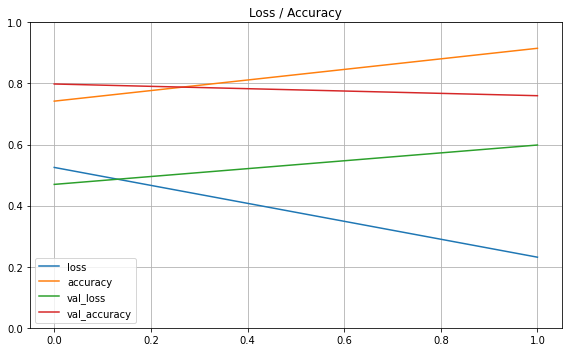

In [33]:
plot_loss(lstm_history)
clean()

# GRU Model

In [34]:
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256,return_sequences = True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128,return_sequences= True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 1024)         25600000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 250, 512)          1969152   
_________________________________________________________________
dropout_3 (Dropout)          (None, 250, 512)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 250, 256)          493056    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250, 256)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               123648    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [35]:
num_epochs = 3
gru_history = gru_model.fit(padded, training_labels, epochs=num_epochs,validation_data= (valid_padded,validation_labels))

Epoch 1/3
179/179 [==============================] - 63s 354ms/step - loss: 0.5282 - accuracy: 0.7469 - val_loss: 0.4680 - val_accuracy: 0.7967
Epoch 2/3
179/179 [==============================] - 62s 346ms/step - loss: 0.1922 - accuracy: 0.9329 - val_loss: 0.6211 - val_accuracy: 0.7568
Epoch 3/3
179/179 [==============================] - 61s 343ms/step - loss: 0.0693 - accuracy: 0.9758 - val_loss: 0.8024 - val_accuracy: 0.7610


In [36]:
gru_predictions = gru_model.predict_classes(np.array(testing_padded))

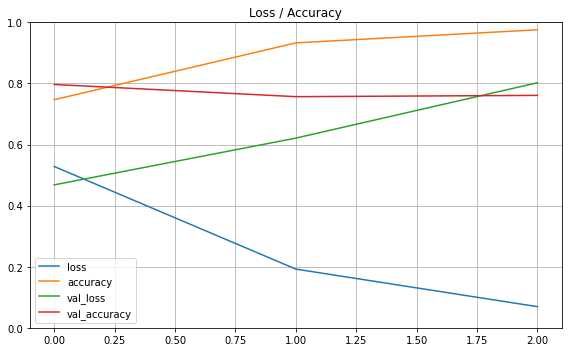

In [37]:
plot_loss(gru_history)
clean()

# Convolutional Model

In [38]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
num_epochs = 1
cnn_history = cnn_model.fit(padded, training_labels, epochs=num_epochs,validation_data= (valid_padded,validation_labels))

179/179 [==============================] - 46s 257ms/step - loss: 0.5177 - accuracy: 0.7499 - val_loss: 0.4540 - val_accuracy: 0.7973


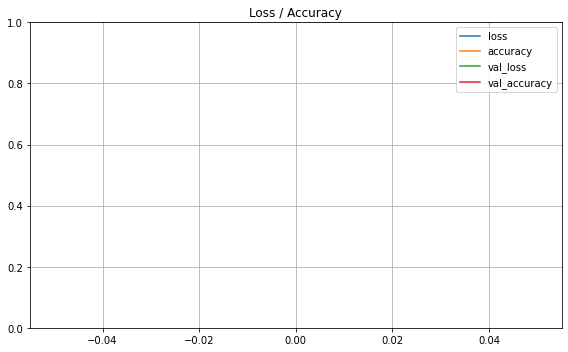

In [40]:
plot_loss(cnn_history)
clean()

In [41]:
cnn_predictions = cnn_model.predict_classes(np.array(testing_padded))

# Submission

In [43]:
submission = test.copy()
sub = pd.DataFrame({'Id':test['id'],'target':cnn_predictions.reshape(-1)})
sub.to_csv('sub.csv',index = False)